### Load data

In [21]:
import pandas as pd

# Load CSV file into DataFrame
df_pca = pd.read_hdf("cluster_result_pca.h5")

In [24]:
df_ae = pd.read_hdf("cluster_result_ae.h5")

In [18]:
df_kmeans = pd.read_hdf("cluster_result_kmeans.h5")

### PCA

In [22]:
df_pca

,0,1,2,3,4,5,6,7,8,9,...,4089,4090,4091,4092,4093,4094,4095,kmean_labels,PCA1,PCA2
0,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462,0,8.557413e-07,2.481766e-07
1,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462,0,4.796608e-07,3.576858e-07
2,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462,0,8.702013e-07,2.095937e-07
3,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462,0,4.796608e-07,3.576858e-07
4,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462,0,4.796608e-07,3.576858e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45829,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462,0,4.796608e-07,3.576858e-07
45830,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462,0,-1.790031e-06,2.171523e-07
45831,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462,0,4.796608e-07,3.576858e-07
45832,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462,0,8.509384e-07,2.507593e-07


In [38]:
import os, sys
sys.path.insert(0, os.path.abspath('.'))
from custom.io import load_nodes_jsonl

def load_nodes(pid_num, cache_dir):
    print("Loading nodes")
    file_name = f"gpt-4o-batch-all-p_2_parser_ManuallyHierarchicalNodeParser_8165_gpu_V100_nodeNum_200_pid_{pid_num}.jsonl"
    file_path = os.path.join(cache_dir, file_name)
    nodes = load_nodes_jsonl(file_path)
    return nodes

nodes = load_nodes(1, os.path.abspath('./.save'))

Loading nodes


Loading gpt-4o-batch-all-p_2_parser_ManuallyHierarchicalNodeParser_8165_gpu_V100_nodeNum_200_pid_1.jsonl: 100%|██████████| 1.33G/1.33G [00:33<00:00, 43.0MB/s]


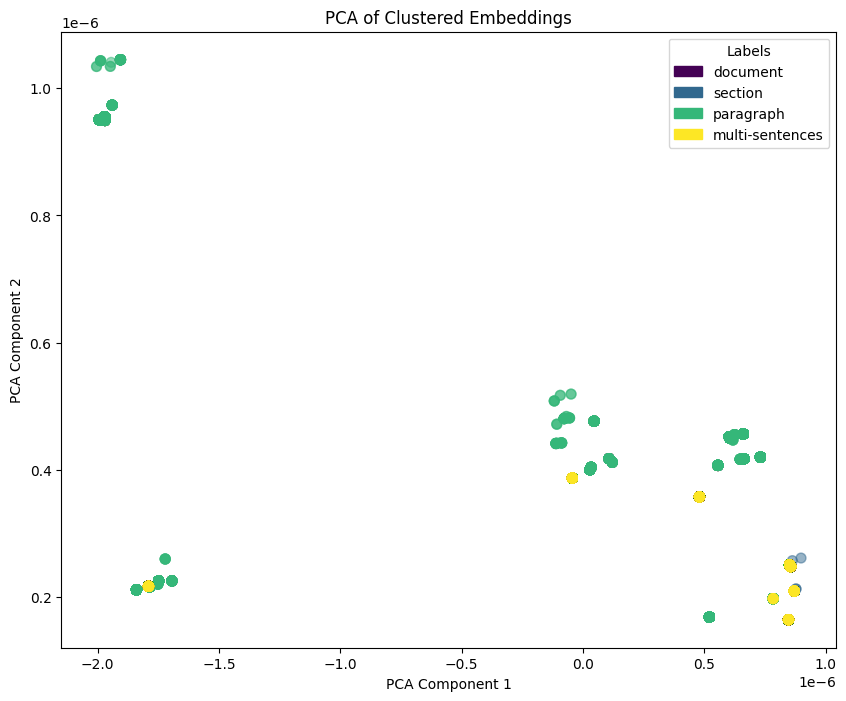

In [48]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Plot the results
plt.figure(figsize=(10, 8))
# scatter = plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_kmeans['kmean_labels'], cmap='viridis', s = 50, alpha=0.5) 

# Create the scatter plot
level2int = {level : i for i, level in enumerate(['document', 'section', 'paragraph', 'multi-sentences'])}
scatter = plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=[level2int[node.metadata['level']] for node in nodes], cmap='viridis', s = 50, alpha=0.5) 
# Reverse the mapping for easy label creation
int2level = {v: k for k, v in level2int.items()}

# Set the ticks to match the integer labels for the levels
# cbar = plt.colorbar(scatter, label='labels')
# cbar.set_ticks([0, 1, 2, 3])
# cbar.set_ticklabels(['document', 'section', 'paragraph', 'multi-sentences'])

# Create a legend using custom patches
handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(level2int[level])), label=level) 
           for level in level2int]

# Add the legend to the plot (in the upper right corner)
plt.legend(handles=handles, title="Labels", loc='upper right')


# Add labels to the points
# for i, node in enumerate(nodes):
#     label = node.metadata['level']  # Get the text label
#     plt.text(df_pca['PCA1'].iloc[i], df_pca['PCA2'].iloc[i], label, fontsize=8, ha='right', color='black')

# Add titles and labels
plt.title('PCA of Clustered Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### t-SNE

In [ ]:
# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['TSNE1'], df['TSNE2'], c=df['dbscan_labels'], cmap='viridis', s=50)
plt.colorbar(scatter, label='dbscan_labels')
plt.title('t-SNE of Clustered Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

### AutoEncoder

In [25]:
df_ae

,0,1,2,3,4,5,6,7,8,9,...,4089,4090,4091,4092,4093,4094,4095,kmean_labels,AE1,AE2
0,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462,3,-0.050465,0.064652
1,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462,0,-0.050465,0.064652
2,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462,2,-0.050465,0.064652
3,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462,0,-0.050465,0.064652
4,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462,0,-0.050465,0.064652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45829,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462,0,-0.050465,0.064652
45830,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462,1,-0.050465,0.064652
45831,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462,0,-0.050465,0.064652
45832,-0.005611,0.00153,-0.004355,0.007697,0.001413,-0.006878,0.009833,-0.002339,-0.004186,-0.000954,...,0.034419,0.008254,0.021117,0.00556,-0.000368,-0.006375,0.007462,2,-0.050465,0.064652


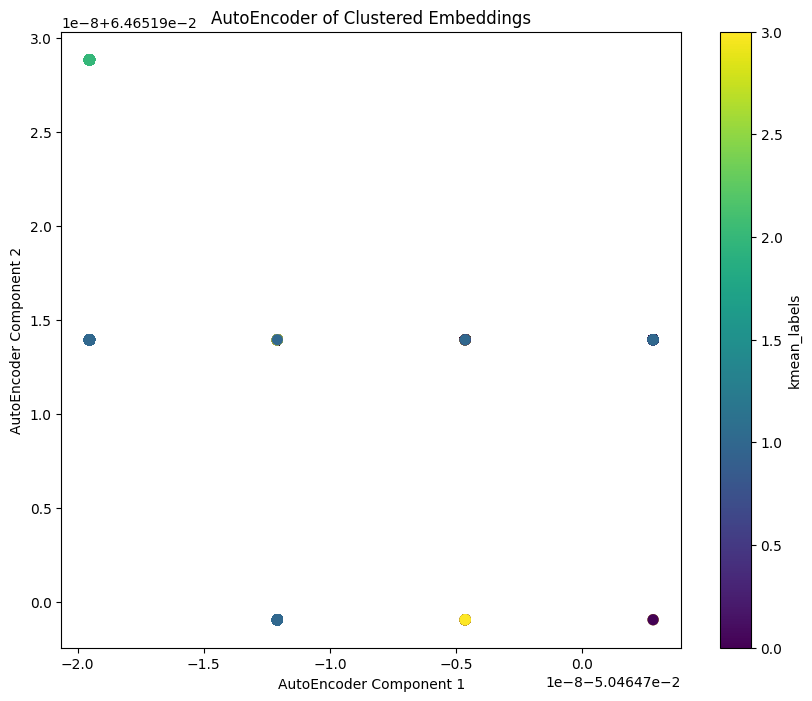

In [28]:
# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_ae['AE1'], df_ae['AE2'], c=df_kmeans['kmean_labels'], cmap='viridis', s=50)
plt.colorbar(scatter, label='kmean_labels')
plt.title('AutoEncoder of Clustered Embeddings')
plt.xlabel('AutoEncoder Component 1')
plt.ylabel('AutoEncoder Component 2')
plt.show()